# Need for investment !!
- Author : Aditya Warnulkar (adwarnulkar@gmail.com) (https://www.linkedin.com/in/aditya-warnulkar-10296327)
- Date : 10/06/2018 ; Latest edit : 11/04/2018
- Location : San Diego , California

People of my generation ***(the Millennials)*** have big career goals and an optimistic outlook. We are tech savvy and most of us even have fancy degrees to our names. But when it comes to finance , our generation appears averse to risks. Most of us take it for granted that our high paying jobs make us financial stable. Well , they do. But is that enough to achieve our financial goals ?

***Would you be able to buy your dream home , drive your dream car , have your dream vacation ??  ***

In this python notebook , I try to shed some light on how easy/difficult it can be to achieve your financial goals. The point I am trying to convey here is that ***"Having a smart investment startegy is extremely crucial to achieve your financial goals"***

I am not an expert in Finance. If you are looking for financial advise , you have come to a wrong place. The goal of this article is to quote few realistic numbers and plots and make you realise the fact that achieving financial goals without any investment is extremely difficult.

Financial planning is definitely essential for long term success. To convey this message , let me tell you a hypothetical story of a 25 year old engineering graduate , ***Sydney*** who is about to start her career.  

Let's meet Sydney .....  :-)

Sydney , a 25 year old engineering student , graduated recently from a premier institute in California. She recently moved to the coastal paradise , *San Diego* to start her career at a major tech company. Sydney instantly fell in love with the crown jewel of Californian coast. 

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="https://github.com/adwarnulkar/finance_modeling/raw/master/images/finance_goals.jpg")

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from src.finance_post_process import get_finance_df

In [3]:
def plot_data (x,y,xlabel='no label',ylabel='no label',title='no title',color='red',rotation=0):
    plt.rc('font', size=16) 
    plt.figure(figsize=[20,8])
    plt.plot(x,y,'*-',color=color,markersize=20)
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.title(title)

# Financial Goals
Like other millennials , Sydney has great aspirations. She plans to buy a home some day , own her dream car , roam the world and raise a loving family. Sydney did some research about property prices in the city and found the following :

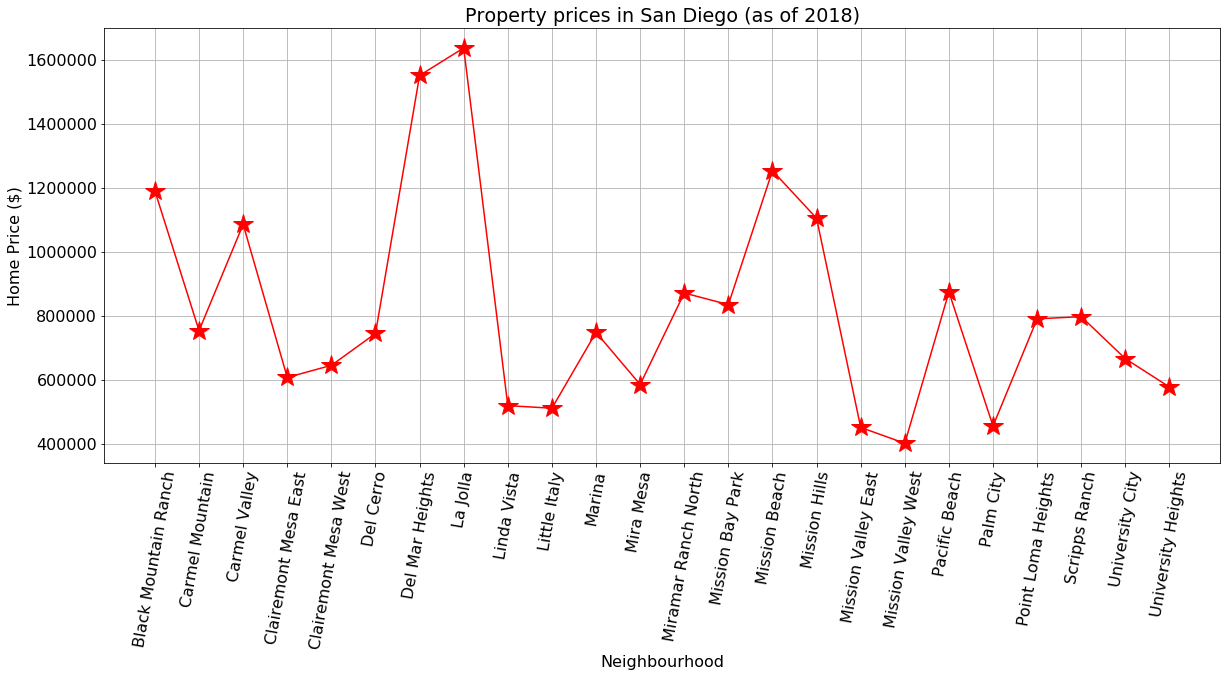

In [4]:
property_csv = './downloads/property.csv'
df_property = pd.read_csv(property_csv)
plot_data(x=df_property.region_name,y=df_property.Current,xlabel='Neighbourhood',ylabel='Home Price ($)',rotation=80,
         title='Property prices in San Diego (as of 2018)')

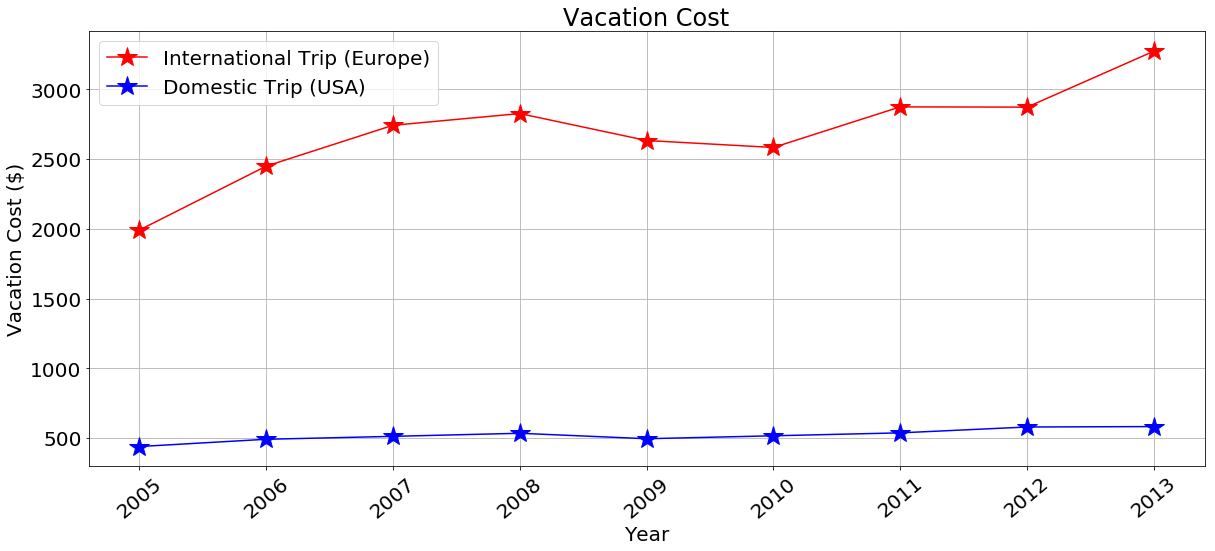

In [5]:
vacation_csv = './downloads/vacation_expenditure.csv'
df_vacation = pd.read_csv(vacation_csv)
plt.rc('font', size=20) 
plt.figure(figsize=[20,8])
plt.plot(df_vacation.Year,df_vacation.international_trip,'*-',color='red',markersize=20,label='International Trip (Europe)')
plt.plot(df_vacation.Year,df_vacation.domestic_trip,'*-',color='blue',markersize=20,label='Domestic Trip (USA)')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Vacation Cost ($)')
plt.xticks(rotation=40)
plt.title('Vacation Cost')
plt.legend()

Based on her research , Sydney decided to have following long term financial goals
- Buy a home in San Diego ***(Cost : \$1.0 Million)***
- Vacation Expenditure over 20 years ***(Cost : \$400,000)***
- Dream Car ***(Cost : \$80,000)***

## ***Total financial target : \$1.5 Million***

Note that the above mentioned value is the cost of Sydney's dreams. Clearly this doesn't include her day to day expenses. This will be accounted in the variable *monthly_expense* which is explained later

# Let's model Sydney's financial future
 To be honest , one can develop complicated financial models for personal finance. The one I have considered is of fairly medium complexity. It has been inspired from my day-to-day experiences with personal finance. If you have suggestions , feel free to contact the author :-)
***
***Disclaimer : The salary quoted in this section was obtained from LinkedIn. Feel free to plugin your base salary and playaround with this notebook***

## Variables
Explaination of the variables used. It's important that you understand each of these variable inorder to follow this article further
- **start_year** : The year in which Sydney started her Career
- **years_of_service** : Sydney's career duration
- **joining_salary** : The first base salary per annum that Sydney drew
- **tax_rate** : Income tax rate incurred per annum by Sydney
- **monthly expense** : Expenditure per month. This covers Sydney's day-to-day expenses
- **expense_rate** : Rate at which Sydney's yearly expenditure increases. This kinda captures inflation and increase in standard of living.
- **growth_rate** : Rate at which Sydney plan's to grow her investments annually.
- **cash_retain_perc** : I consider this to be the most important variable. Percentage of your yearly savings that you plan to retain. The rest of it will be invested. This indicates your financial risk apetite. Higher value indicates that you are reluctant to invest and hence you would be a low risk taking investor

***
***Disclaimer : The default values used in the below cell are the assumptions made for a typical new college grad with a masters degree working in San Diego. Feel free to change the values.***

In [6]:
start_year       = 2019
joining_salary   = 105000 # Typical NCG salary in San Diego , California
tax_rate         = 30     # California Tax rate for H1B visa holder
monthly_expense  = 3000
expense_rate     = 2
growth_rate      = 10
years_of_service = 20
cash_retain_perc = 60

In [7]:
df = get_finance_df(start_year=start_year,joining_salary=joining_salary,tax_rate=tax_rate,
                    monthly_expense=monthly_expense,expense_rate=expense_rate,
                    growth_rate=growth_rate,years_of_service=years_of_service,
                    cash_retain_perc=cash_retain_perc)

## Sneak peek into Sydney's financial future : Numbers don't lie !!

Sydney should be particularly concerned about 2 columns in the below table. 
- ***yearly_savings*** : Sydney's financial growth without investment
- ***ROI (Returns on Investment)*** : Sydney's financial growth with investment

All the amounts quoted are in **USD**

In [8]:
df

,year,yearly_income_pre_taxed,hike_perc,yearly_income_post_taxed,yearly_expenditure,yearly_savings,cash_retained,cash_invested,ROI
0,2019,105000,0,73500,36000,37500,22500,15000,100912
1,2020,107100,2,74970,36720,38250,22950,15300,102930
2,2021,111384,4,77968,37454,40514,24308,16205,109024
3,2022,113611,2,79528,38203,41324,24794,16529,111204
4,2023,115883,2,81118,38967,42151,25290,16860,113428
5,2024,120519,4,84363,39746,44616,26769,17846,120063
6,2025,122929,2,86050,40541,45508,27305,18203,122464
7,2026,125388,2,87771,41352,46419,27851,18567,124913
8,2027,130403,4,91282,42179,49102,29461,19641,132135
9,2028,133011,2,93108,43023,50084,30050,20033,134778


- Investing your savings is really important for a secure future.
- Meeting your financial aspirations solely on your yearly savings is extremely difficult.
- Yearly savings will help you to sustain. But inorder to achieve your financial dreams , __you need to invest with a good rate of return__.
- The corpus that you intend to build at the end of the defined period is sensitive to the rate of return the investment generates. A small variation to rate can have a big impact on the corpus (shown later)
- Choose an instrument that best suits your risk and return appetite
- Equity should be a part of your investment if you want to beat the inflation in the long run

Text(0.5,1,'The Bitter Truth (Why you should invest ?)')

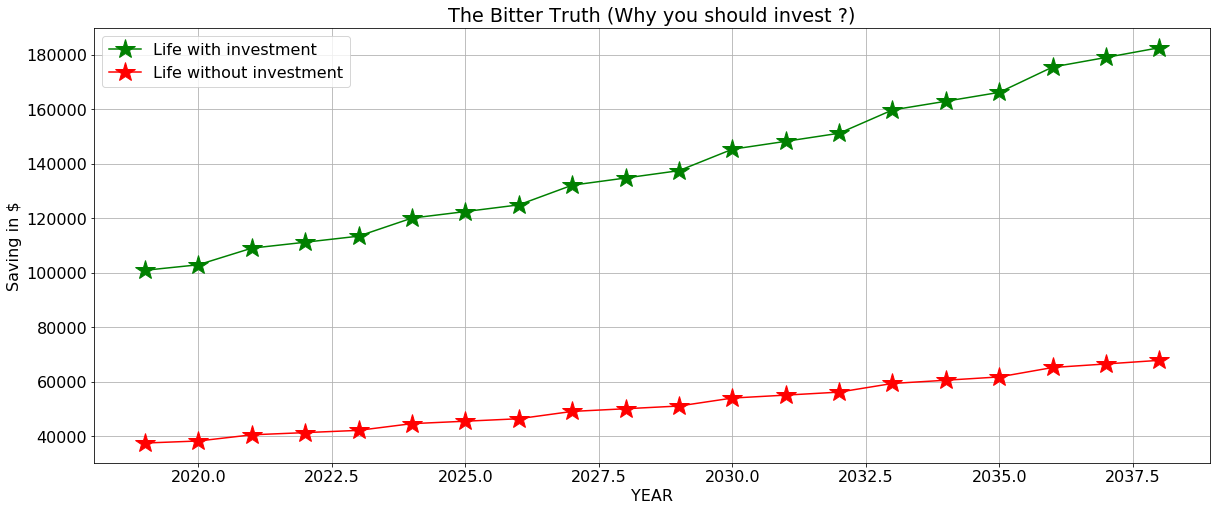

In [9]:
plt.rc('font', size=16) 
plt.figure(figsize=[20,8])
plt.plot(df.year,df.ROI,'*-',color='green',markersize=20,label='Life with investment')
plt.plot(df.year,df.yearly_savings,'*-',color='red',markersize=20,label='Life without investment')
plt.legend()
plt.grid()
plt.xlabel('YEAR')
plt.ylabel('Saving in $')
plt.title('The Bitter Truth (Why you should invest ?)')

# The Bitter truth !!
For me this is the most important observation in this whole article

***<font color='green'> Green Line   : If Sydney invests 40% of her yearly savings and grows them annually at 10% over 20 years period , she will be able to meet her financial dreams somewhere around year 2031 (11th year in her career) </font>***

***<font color='red'> Red Line : If Sydney doesn't invest her savings , she will have only a surplus of \~\$700K at the end of her career. Clearly this amount is not at all sufficient to achieve her financial goals </font>***

The above two observations is simple arithmetic and not rocket science. Yet its mind boggling to me to notice that most of us don't understand the importance of investment. 

#### ***Do you want your life to be Green Curve or the Red Curve ?? Your call !!***

# Lets get 'Trend'y

- The analysis done so far had all the finance parameter fixed to a particular value. 
- Inorder to get an idea about what growth rate and base salary suits your financial aspiration , we need to analyse how the ***ROI (Return on Investment)*** varies with these financial parameters

## How does Return on Investment vary with time ??
- In the below plot , the growth rate on your investment is assumes to be fixed each year.(One can debate if this is a fair assumption. But lets keep our model simple). The point here is to convey the message "Need for investment".
- The trend is fairly linear for a given growth rate. The bends in the curve are due to hike in Sydney's salary which results in higher ROI.
- Try changing the growth rate in variable section inorder to see if you are able to meet you financial goal.

***Are you able to meet your financial target ??***

If not , then you better start thinking about improving your growth rate on investment.

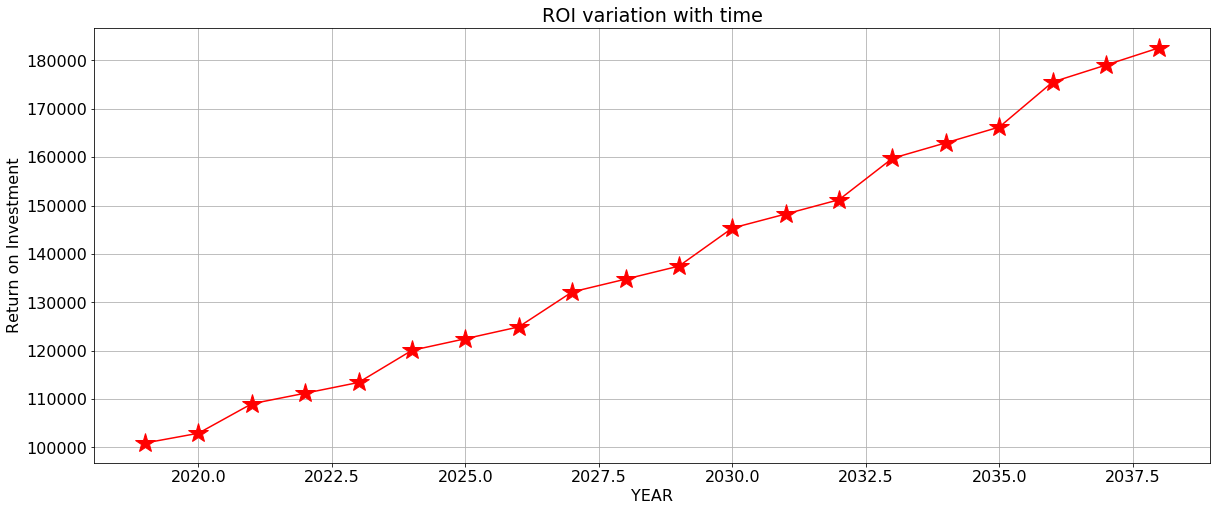

In [10]:
plot_data(x=df.year,y=df.ROI,color='red',xlabel='YEAR',ylabel='Return on Investment',
         title='ROI variation with time')

## How does Return on Investment vary with growth rate ??

> ***"Compund interest is the eight wonder of the world. He who understands it , earns it. He who doesn't , pays it"***
> \- Albert Einstein


- The trend between ROI and growth rate is exponential. That's the beauty of compound interest. Even a minor change in annual growth rate can make Sydney a millionaire. 
- It would be interesting to see at what growth rate you are able to achieve a financial target of 1 Million USD
- Maintaining a steady growth rate over 10% throughout your career is not a joke. Trust me !!

***Are you able to meet your financial target at lower growth rate ??***

If not , then you better start thinking about improving your growth rate on investment.

In [11]:
rate = np.arange(2,12)
ROI = np.array([get_finance_df(growth_rate=r).sum()['ROI'] for r in rate])

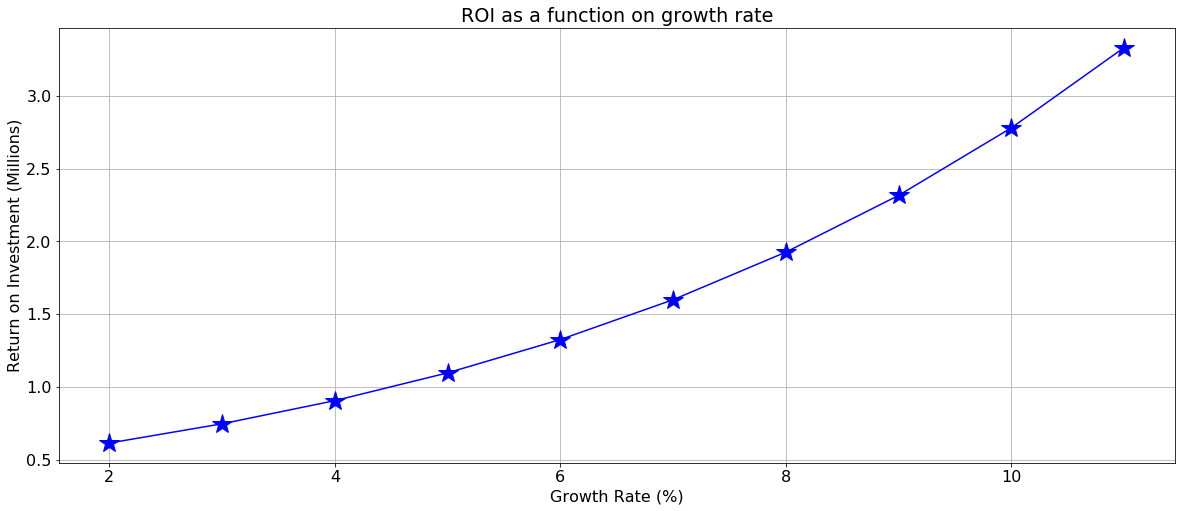

In [12]:
plot_data(x=rate,y=ROI/1e6,color='blue',xlabel='Growth Rate (%)',ylabel='Return on Investment (Millions)',
         title='ROI as a function on growth rate')

## How does Return on Investment vary with your base salary

- Many people who are amatuer in finance , have this wrong notion that base salary is more important than your investment strategy. 
- There is no denying the fact that base salary places a crucial role. But its very important to understand that the impact of growth rate on your ROI is much more than that of base salary
- To prove this point , lets see how the ROI varies with base salary.

In [13]:
base_salary = np.arange(90000,140000,10000)
ROI = np.array([get_finance_df(joining_salary=base).sum()['ROI'] for base in base_salary])

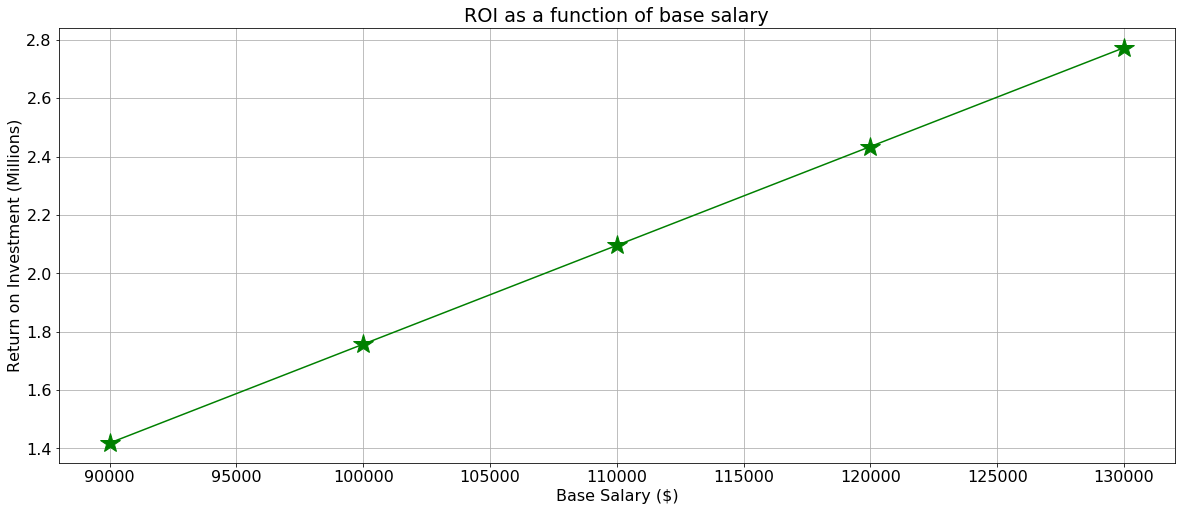

In [14]:
plot_data(x=base_salary,y=ROI/1e6,color='green',xlabel='Base Salary ($)',ylabel='Return on Investment (Millions)',
         title='ROI as a function of base salary')

***Notice that ROI varies exponentially with growth rate , where as it varies linearly with base salary. Even a high school kid can appreciate the fact that exponential growth is always better than linear growth.***

***Hence you should worry less about increasing your base salary and worry more about imporving your investment growth rate. Improving growth rate is clearly a bigger fish to fry.***

## High risk equates to higher returns , but how ??

- You might have already come across this statement "High risk pays higher returns". Lets see this in action
- $risk = 100 - cash\_retain\_perc$ indicates how much of your savings you are willing to risk. This can be considered as your risk factor

***At what risk factor are you able to reach your financial goal ?? Accordinly decide if you need to a safe investor or a high risk taking investor***

In [15]:
risk_factor = np.arange(10,100,10)
ROI = np.array([get_finance_df(cash_retain_perc=100-risk).sum()['ROI'] for risk in risk_factor])

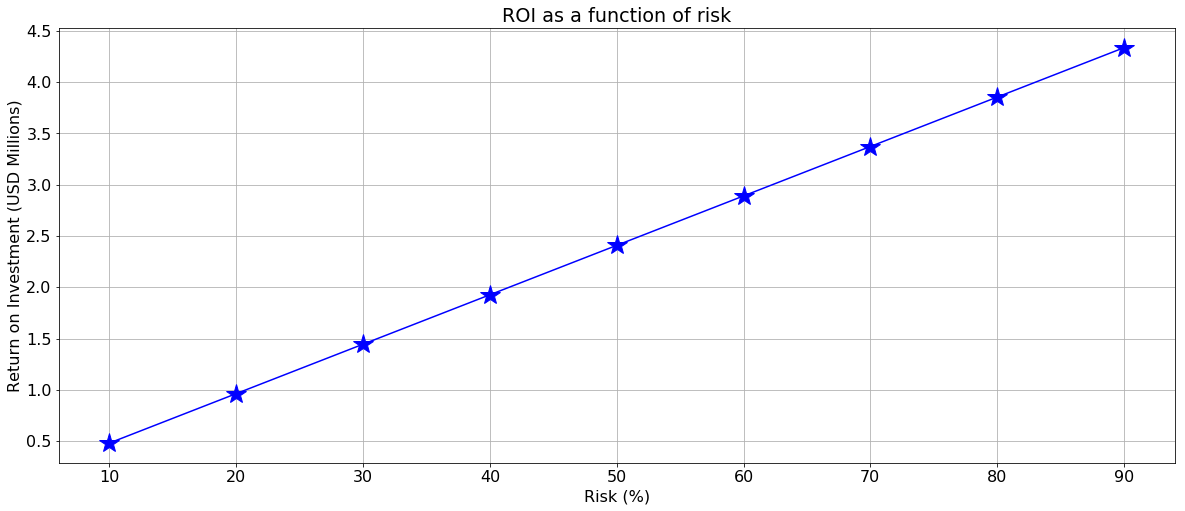

In [16]:
plot_data(x=risk_factor,y=ROI/1e6,color='blue',xlabel='Risk (%)',ylabel='Return on Investment (USD Millions)',
         title='ROI as a function of risk')

I hope this article was useful. Feel free to contact the author for your feedback or suggestions.

***Happy financing !! Fight On !!***

# Fixed Deposit : Is it better to have FD in India or in US ??

 Fixed deposit is the safest form of investment that one can consider. Would you opt for an FD in India or in US ?
 
 
 Well , its a known fact that the FD rate of interest is India is much higher as compared to US. Frankly , there is no need of any analysis to conclude that its always better to have FD in India as compared to US. 
 
 But , how much better is the ROI for an FD in India as compared to US ? Lets find out !

In [17]:
USD_to_INR = 70
P_USD = 10000
P_INR = P_USD * USD_to_INR
n = np.arange(0,11)
print ("Principal amount in USD $ {}".format(P_USD))
print ("Principal amount in INR Rs {}".format(P_INR))

Principal amount in USD $ 10000
Principal amount in INR Rs 700000


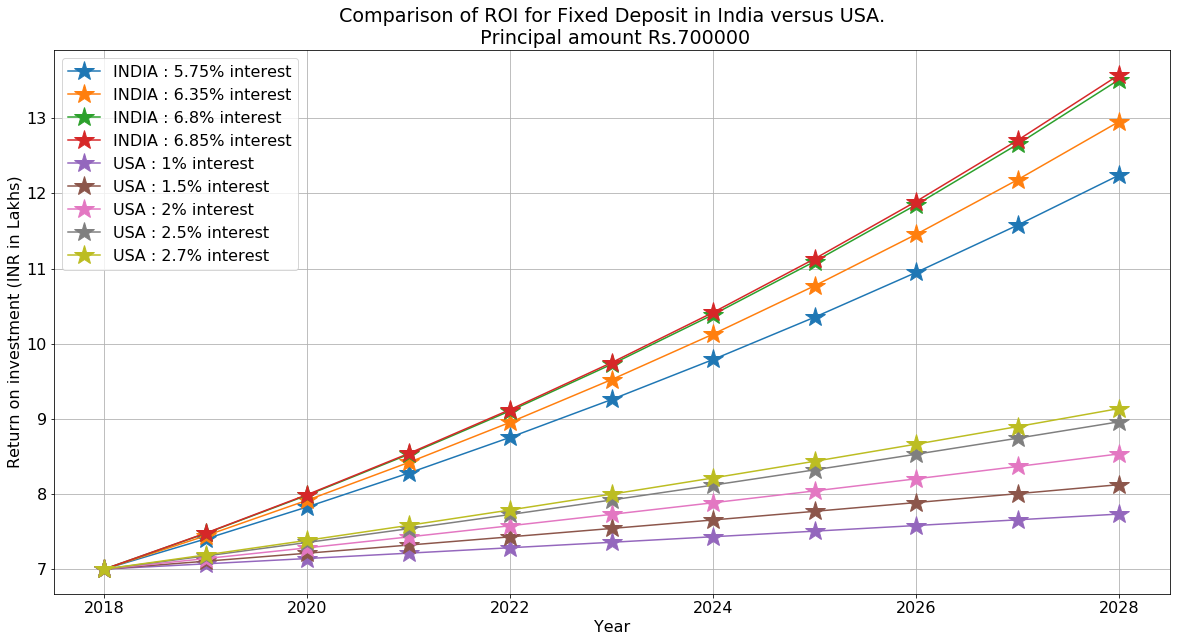

In [18]:
rates_INDIA = [5.75 , 6.35 , 6.8 , 6.85]
rates_USA = [1 , 1.5 , 2 , 2.5 , 2.7]

plt.figure(figsize=[20,10])
for r in rates_INDIA:
    M = P_INR*((1 + r/100)**n)
    plt.plot(n+2018,M/1e5,'-*',markersize=20,label=f'INDIA : {r}% interest')
    
for r in rates_USA:
    M = P_INR*((1 + r/100)**n)
    plt.plot(n+2018,M/1e5,'-*',markersize=20,label=f'USA : {r}% interest')
    
plt.xlabel("Year")
plt.ylabel("Return on investment (INR in Lakhs)")
plt.title(f"Comparison of ROI for Fixed Deposit in India versus USA.\n Principal amount Rs.{P_INR}")
plt.grid()
plt.legend()

***Conclusion : ***
- ***Clearly the rate of growth of an FD if India is better than that in US. So it makes sense to have an FD in India***
- ***After 10 years , the principal amount of <font color='blue'>7L</font> get matured to <font color='green'>14L</font> in India as compated to just <font color='red'>9L</font> in US ***

# Riding the Rupee wave
In section section , lets analyse how Rupee variation impact the growth rate of FD

USD_to_INR is considered as a Random variable with Normal distribution with mean at 70 and std of 2. It can be debated if this is a practical model. 

Text(0.5,1,'Distribution of USD to INR (Mean : 70 ; std : 2)')

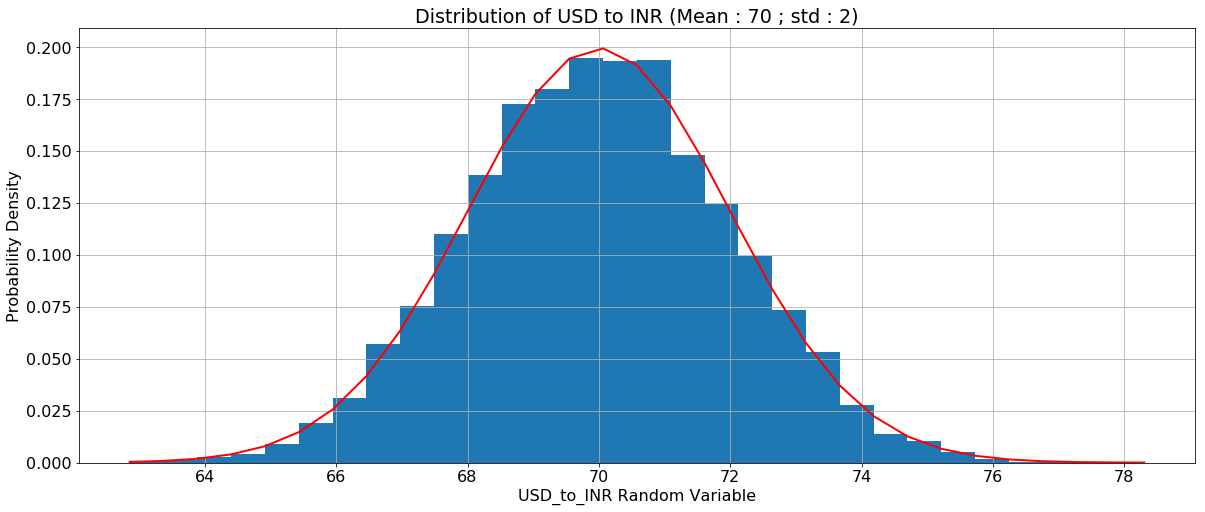

In [19]:
plt.figure(figsize=[20,8])
mu = 70 ; sigma = 2
USD_to_INR_samples = np.random.normal(loc=mu,scale=sigma,size=10000)
count, bins, ignored = plt.hist(USD_to_INR_samples, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.xlabel("USD_to_INR Random Variable")
plt.ylabel("Probability Density")
plt.grid()
plt.title(f"Distribution of USD to INR (Mean : {mu} ; std : {sigma})")

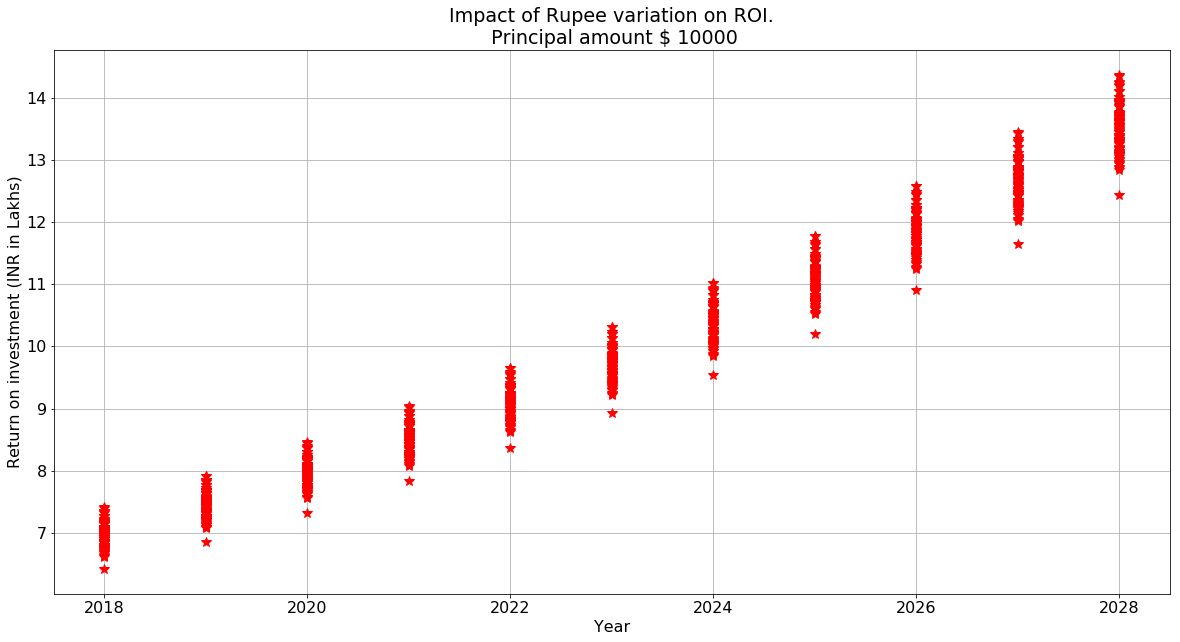

In [20]:
USD_to_INR_samples = np.random.normal(loc=mu,scale=sigma,size=100)
r = 6.85
n = np.arange(0,11)
plt.figure(figsize=[20,10])
for USD_to_INR in USD_to_INR_samples:
    P_INR = P_USD*USD_to_INR
    M = P_INR*((1 + r/100)**n)
    plt.plot(n+2018,M/1e5,'*',color='r',markersize=10)
    
plt.xlabel("Year")
plt.ylabel("Return on investment (INR in Lakhs)")
plt.title(f"Impact of Rupee variation on ROI.\n Principal amount $ {P_USD}")
plt.grid()

The above plot captures the variation in ROI for each year seen due to Rupee variation

***Conclusion : ***
- ***In 2028 , the ROI for FD can swing from 12.5L to 14.5L due to Rupee variation***